In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Temporal trends for posts and comments

### Posts


In [3]:
posts = pd.read_csv("/Users/fabianmahner/submissions-fabioconsiglio/Project/data/archive/the-reddit-climate-change-dataset-posts.csv")


In [4]:
posts

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,x2smmw,2vh0v,democraticsocialism,False,1661990237,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15
1,post,x2slxy,2w844,nostupidquestions,False,1661990182,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2
2,post,x2slk5,6wzx9b,eduwriters,False,1661990150,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1
3,post,x2sbz6,46adh7,alternatitvereality,False,1661989389,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1
4,post,x2sa2a,2qh1i,askreddit,False,1661989240,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
620903,post,aki85,2qh1n,environment,False,1262350233,https://old.reddit.com/r/environment/comments/...,seminal.firedoglake.com,http://seminal.firedoglake.com/diary/21707,NaN,Climate Change: Five Easy New Year’s Resolutions,0
620904,post,akgtp,2qk5q,climateskeptics,False,1262333495,https://old.reddit.com/r/climateskeptics/comme...,examiner.com,http://www.examiner.com/x-25061-Climate-Change...,NaN,2009 climate change story of the year - Climat...,4
620905,post,akgkb,2qk5q,climateskeptics,False,1262330777,https://old.reddit.com/r/climateskeptics/comme...,ritholtz.com,http://www.ritholtz.com/blog/2009/12/statistic...,NaN,Statistics: Scientific Consensus on Climate Ch...,0
620906,post,akgbz,2qk5q,climateskeptics,False,1262328753,https://old.reddit.com/r/climateskeptics/comme...,wattsupwiththat.com,http://wattsupwiththat.com/2009/12/31/ultimate...,NaN,Ultimate irony: Snowstorm squelches “screaming...,9


In [5]:
# Umwandlung der Timestamps in ein lesbares Datumsformat
posts["created_utc"] = pd.to_datetime(posts["created_utc"], unit="s")
posts["created_utc"]

0        2022-08-31 23:57:17
1        2022-08-31 23:56:22
2        2022-08-31 23:55:50
3        2022-08-31 23:43:09
4        2022-08-31 23:40:40
                 ...        
620903   2010-01-01 12:50:33
620904   2010-01-01 08:11:35
620905   2010-01-01 07:26:17
620906   2010-01-01 06:52:33
620907   2010-01-01 00:12:30
Name: created_utc, Length: 620908, dtype: datetime64[ns]

In [6]:
posts['year'] = posts['created_utc'].dt.year

In [7]:
posts

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score,year
0,post,x2smmw,2vh0v,democraticsocialism,False,2022-08-31 23:57:17,https://old.reddit.com/r/DemocraticSocialism/c...,twitter.com,https://twitter.com/SusanofTexas/status/156480...,NaN,“Cities without water” is our future. The lead...,15,2022
1,post,x2slxy,2w844,nostupidquestions,False,2022-08-31 23:56:22,https://old.reddit.com/r/NoStupidQuestions/com...,self.nostupidquestions,NaN,Ok so I was having a conversation with my neig...,Sharks and climate change,2,2022
2,post,x2slk5,6wzx9b,eduwriters,False,2022-08-31 23:55:50,https://old.reddit.com/r/EduWriters/comments/x...,eduwriters.pro,https://eduwriters.pro/?cid=2860/?utm_source=r...,NaN,How to start a climate change essay,1,2022
3,post,x2sbz6,46adh7,alternatitvereality,False,2022-08-31 23:43:09,https://old.reddit.com/r/AlternatitveReality/c...,i.imgur.com,https://i.imgur.com/wJbchkQ.jpg,NaN,Ever notice that when it’s hot a few days in J...,1,2022
4,post,x2sa2a,2qh1i,askreddit,False,2022-08-31 23:40:40,https://old.reddit.com/r/AskReddit/comments/x2...,self.askreddit,NaN,[deleted],How would you react if the next American presi...,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620903,post,aki85,2qh1n,environment,False,2010-01-01 12:50:33,https://old.reddit.com/r/environment/comments/...,seminal.firedoglake.com,http://seminal.firedoglake.com/diary/21707,NaN,Climate Change: Five Easy New Year’s Resolutions,0,2010
620904,post,akgtp,2qk5q,climateskeptics,False,2010-01-01 08:11:35,https://old.reddit.com/r/climateskeptics/comme...,examiner.com,http://www.examiner.com/x-25061-Climate-Change...,NaN,2009 climate change story of the year - Climat...,4,2010
620905,post,akgkb,2qk5q,climateskeptics,False,2010-01-01 07:26:17,https://old.reddit.com/r/climateskeptics/comme...,ritholtz.com,http://www.ritholtz.com/blog/2009/12/statistic...,NaN,Statistics: Scientific Consensus on Climate Ch...,0,2010
620906,post,akgbz,2qk5q,climateskeptics,False,2010-01-01 06:52:33,https://old.reddit.com/r/climateskeptics/comme...,wattsupwiththat.com,http://wattsupwiththat.com/2009/12/31/ultimate...,NaN,Ultimate irony: Snowstorm squelches “screaming...,9,2010


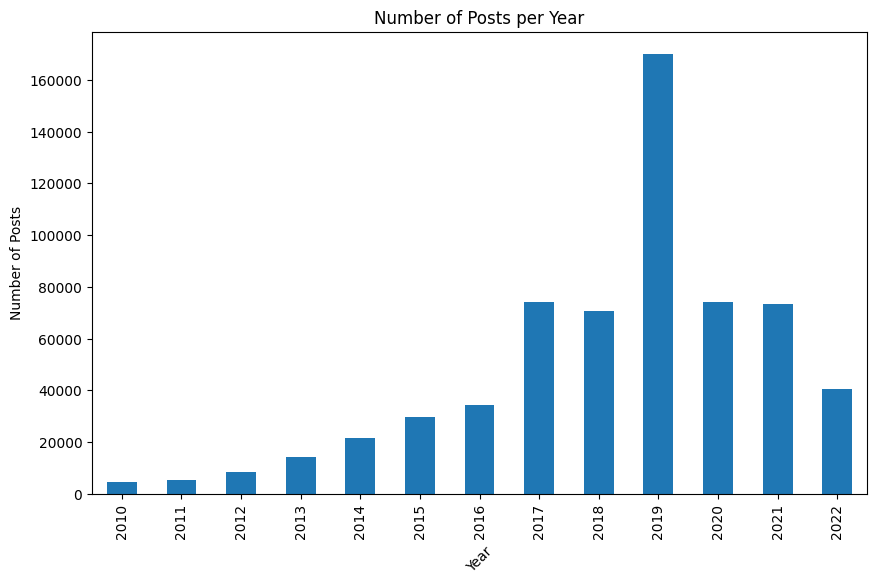

In [11]:
posts_per_year = posts['year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
posts_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Year')
plt.show()

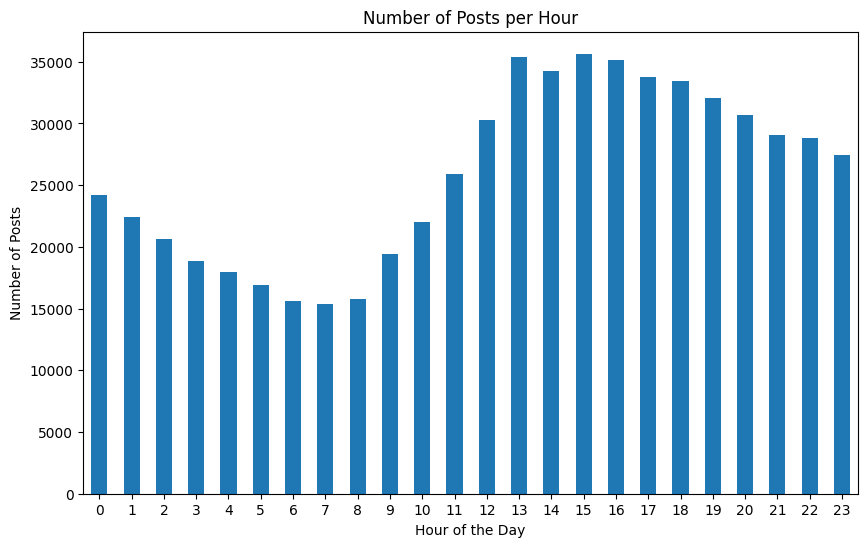

In [46]:
posts['hour'] = posts['created_utc'].dt.hour

# Count the number of posts per hour
posts_per_hour = posts.groupby('hour').size()

# Plot the distribution
plt.figure(figsize=(10,6))
posts_per_hour.plot(kind='bar')
plt.title('Number of Posts per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

### Comments

In [79]:
comments = pd.read_csv("/Users/fabianmahner/submissions-fabioconsiglio/Project/data/archive/the-reddit-climate-change-dataset-comments.csv")

In [40]:
# Umwandlung der Timestamps in ein lesbares Datumsformat
comments["created_utc"] = pd.to_datetime(comments["created_utc"], unit="s")
comments["created_utc"]

0         2022-08-31 23:59:28
1         2022-08-31 23:59:00
2         2022-08-31 23:58:47
3         2022-08-31 23:57:58
4         2022-08-31 23:56:46
                  ...        
4600693   2010-01-01 12:37:36
4600694   2010-01-01 07:05:41
4600695   2010-01-01 02:54:40
4600696   2010-01-01 02:30:18
4600697   2010-01-01 00:34:07
Name: created_utc, Length: 4600698, dtype: datetime64[ns]

In [43]:
comments['year'] = comments['created_utc'].dt.year

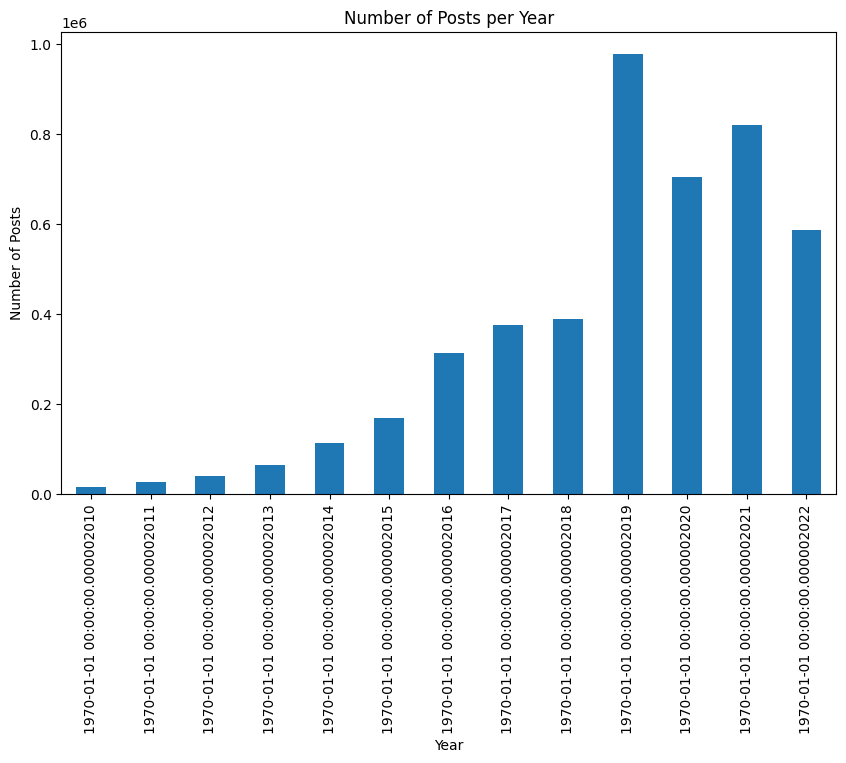

In [78]:
comments_per_year = comments['year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
comments_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Year')
plt.show()

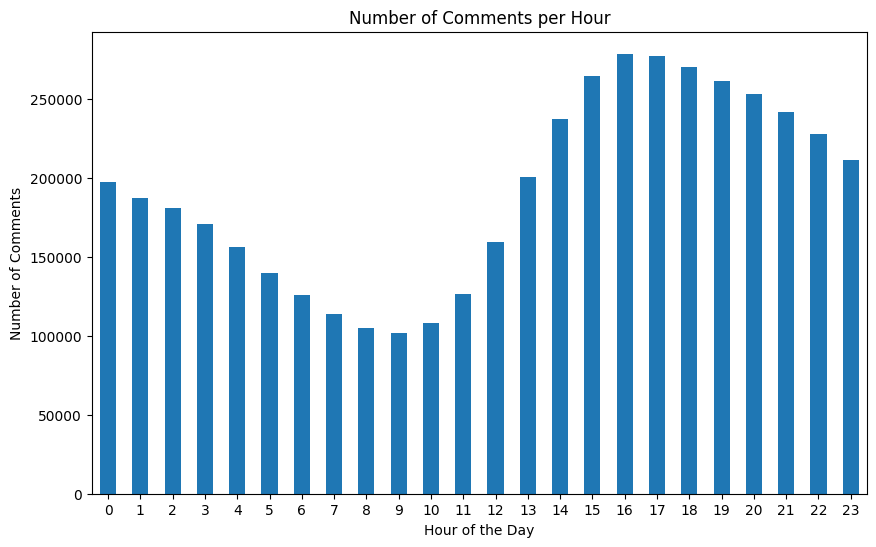

In [49]:
comments['hour'] = comments['created_utc'].dt.hour

# Count the number of posts per hour
comments_per_hour = comments.groupby('hour').size()

# Plot the distribution
plt.figure(figsize=(10,6))
comments_per_hour.plot(kind='bar')
plt.title('Number of Comments per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.show()

### bar charts of most common words/hashtags in posts and comments


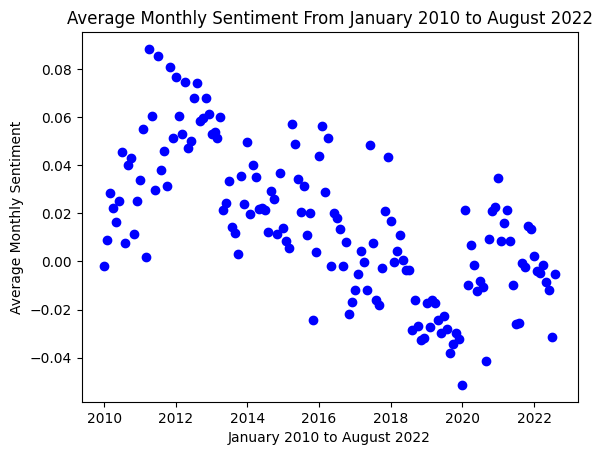

In [71]:
avgMonthlySentimentSeries = comments.groupby(pd.PeriodIndex(comments['created_utc'], freq="M"))['sentiment'].mean()

plt.scatter(avgMonthlySentimentSeries.index.to_timestamp(),avgMonthlySentimentSeries,color="blue")

plt.title("Average Monthly Sentiment From January 2010 to August 2022")

#Label the x-axis
plt.xlabel("January 2010 to August 2022")

# label the y-axis
plt.ylabel("Average Monthly Sentiment")

# show the plot
plt.show()

#boxplot oder barchart für die sentimentverteilung
# halb jährlich oder jahres ebene zusammenfassen

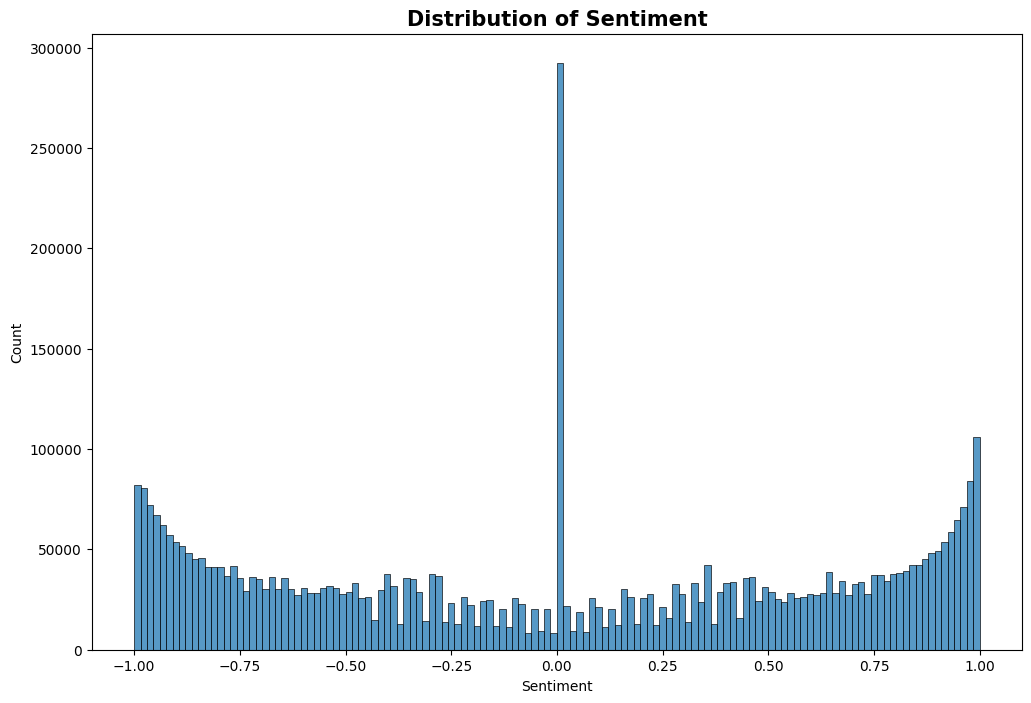

In [53]:
plt.figure(figsize=(12, 8))

# Plotting using histplot to include KDE
ax = sns.histplot(comments["sentiment"])
plt.title('Distribution of Sentiment', fontweight='bold', fontsize=15)
plt.xlabel('Sentiment')

# Display the plot
plt.show()

### Number of posts & comments, unique subreddits and most common words

In [19]:
# word frequency distribution 
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import wordcloud
import string
import nltk 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fabianmahner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fabianmahner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
preprocessed_comments = pd.read_csv("/Users/fabianmahner/dlss-project24/data/preprocessed/comments.csv")

# lemmatized column nehmen 
# column title_lemmatized 
# column title_selftext_lemmatized
# most common words in a column of a dataframe erstellen


In [41]:
preprocessed_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   id          2000 non-null   object
 2   body        2000 non-null   object
 3   cleaned     1981 non-null   object
 4   lemmatized  2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [66]:
def most_common_word(dataframe, column):
    # Check if the column exists in the dataframe
    if column not in dataframe.columns:
        raise ValueError(f"Column '{column}' does not exist in the dataframe.")

    # Combine all comments into a single string
    all_comments = " ".join(dataframe[column].astype(str))

    # Tokenize the string
    tokens = word_tokenize(all_comments)

    # Remove punctuation and lowercase the tokens
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]
    tokens = [word.lower() for word in tokens]

    # Remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]

    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Create a frequency distribution
    freq_dist = Counter(tokens)

    # Get the 10 most common words
    most_common = freq_dist.most_common(10)

   
    print("\nMost common words:")
    for word, freq in most_common:
        print(f"{word}: {freq}")
    # Just exclude climate and change
    most_common_excluding_first_two = most_common[2:]
    plt.figure(figsize=(12, 8))
    plt.bar([word for word, freq in most_common_excluding_first_two], [freq for word, freq in most_common_excluding_first_two])
    plt.title('Most Common Words in Comments', fontweight='bold', fontsize=15)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()


Most common words:
change: 2822
climate: 2766
people: 1154
like: 802
make: 770
say: 709
go: 705
would: 686
get: 649
think: 633


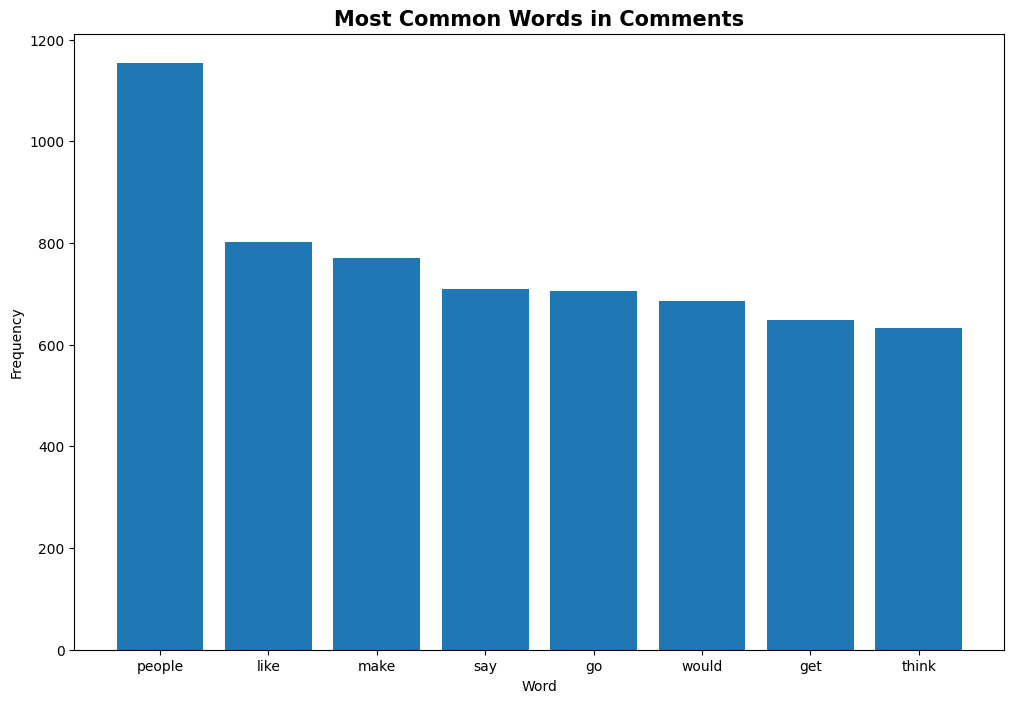

In [67]:
most_common_word(preprocessed_comments, "lemmatized")

# Word Count for posts

In [63]:
preprocessed_posts = pd.read_csv("/Users/fabianmahner/dlss-project24/data/preprocessed/posts.csv")

In [68]:
preprocessed_posts

,Unnamed: 0,id,title,selftext,title_cleaned,title_lemmatized,selftext_cleaned,selftext_lemmatized,title_and_text,title_and_text_cleaned,title_and_text_lemmatized
0,0,6estdf,"Reddit, why is the world pinning their hopes o...",NaN,reddit why is the world pinning their hopes on...,reddit why be the world pin their hope on poli...,NaN,NaN,NaN,NaN,NaN
1,1,3en5h3,Jeremy Corbyn's brother is climate change deny...,NaN,jeremy corbyn brother is climate change denyin...,jeremy corbyn brother be climate change deny m...,NaN,NaN,NaN,NaN,NaN
2,2,a3de8u,Norway to heavily restrict palm oils linked to...,NaN,norway to heavily restrict palm oils linked to...,norway to heavily restrict palm oil link to de...,NaN,NaN,NaN,NaN,NaN
3,3,i5osjm,Lockdown emissions fall will have 'no effect' ...,Lockdown emissions fall will have 'no effect' ...,lockdown emissions fall will have no effect on...,lockdown emission fall will have no effect on ...,lockdown emissions fall will have no effect on...,lockdown emission fall will have no effect on ...,Lockdown emissions fall will have 'no effect' ...,lockdown emissions fall will have no effect on...,lockdown emission fall will have no effect on ...
4,4,3u3evq,Some 690Mln Children Worldwide Affected by Cli...,NaN,some children worldwide affected by climate ch...,some child worldwide affect by climate change,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,3p4jxq,"Kerry urges 'ambitious' climate deal, warns on...",[deleted],kerry urges ambitious climate deal warns on fo...,kerry urge ambitious climate deal warn on food...,NaN,NaN,"Kerry urges 'ambitious' climate deal, warns on...",NaN,NaN
1996,1996,ezijlz,People still don't believe climate change is r...,NaN,people still do believe climate change is real...,people still do believe climate change be real...,NaN,NaN,NaN,NaN,NaN
1997,1997,6d2u4u,[World News]Pope-Trump meeting agenda: Climate...,NaN,world trump meeting agenda climate change terr...,world trump meeting agenda climate change terr...,NaN,NaN,NaN,NaN,NaN
1998,1998,4boi94,Climate change might be good news for French w...,NaN,climate change might be good news for french w...,climate change might be good news for french w...,NaN,NaN,NaN,NaN,NaN



Most common words:
climate: 2124
change: 2076
world: 159
say: 145
trump: 120
fight: 101
global: 93
make: 89
could: 85
people: 82


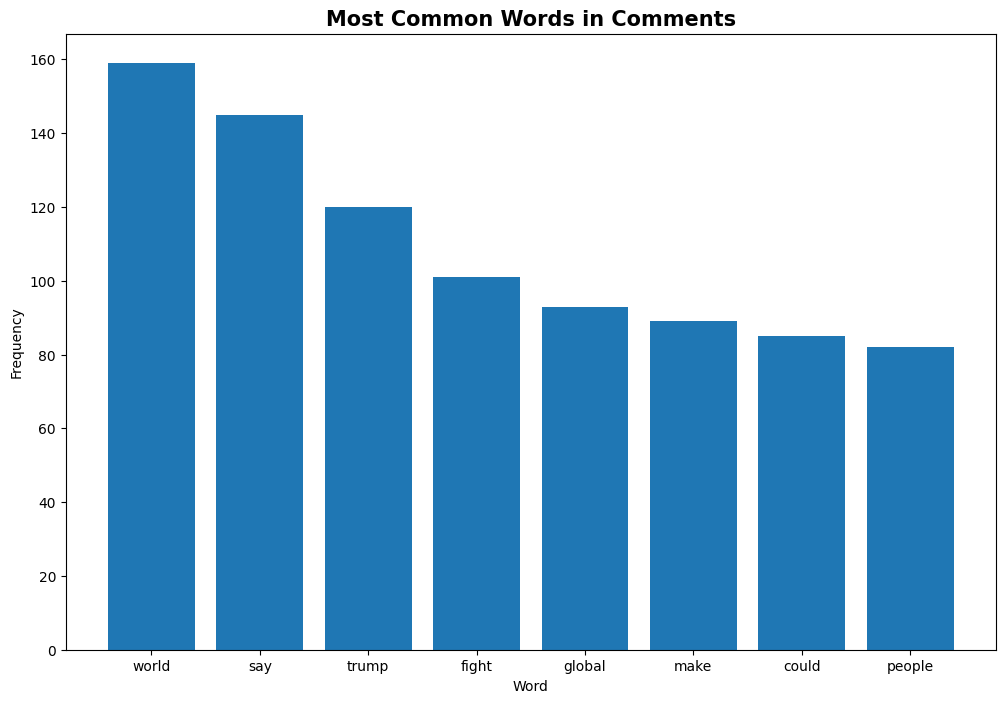

In [69]:
most_common_word(preprocessed_posts, "title_lemmatized")

In [56]:
# Visualize the data, e.g. word clouds, bar charts of most common words/hashtags and temporal trends in the number of posts.
from wordcloud import WordCloud

def word_cloud(dataframe, column):
    all_comments = " ".join(dataframe[column].astype(str))
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_comments)

    # Display the WordCloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Comments', fontweight='bold', fontsize=15)
    plt.show()

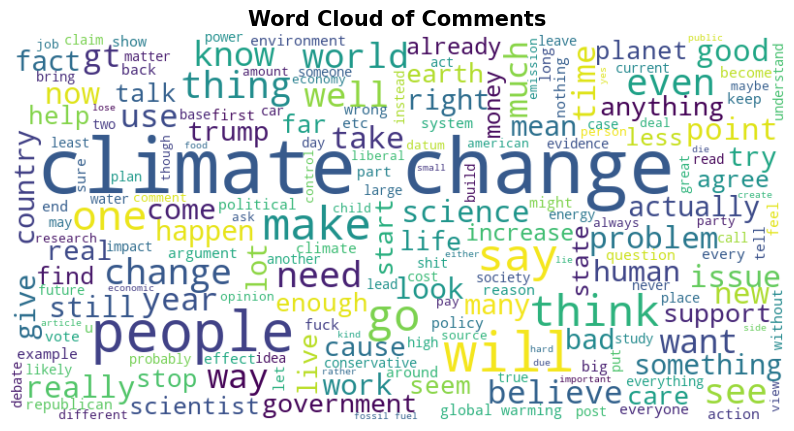

In [58]:
word_cloud(preprocessed_comments, "lemmatized")